In [2]:
import pandas as ps
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dk_csv = 'dk.csv'
us_csv = 'us.csv'

In [4]:
dk_csv = ps.read_csv(dk_csv)
us_csv = ps.read_csv(us_csv)
#us.columns = us.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

us = us_csv.as_matrix()
dk = dk_csv.as_matrix()

/home/guttesen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/home/guttesen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [31]:
#test = dk.groupby(['Doedsaarsag']).describe()


/home/guttesen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


/home/guttesen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [5]:
dk_df = ps.DataFrame(dk)
us_df = ps.DataFrame(us)

['All causes' "Alzheimer's disease" 'CLRD' 'Cancer' 'Diabetes'
 'Heart disease' 'Influenza and pneumonia' 'Kidney disease' 'Stroke'
 'Suicide' 'Unintentional injuries']


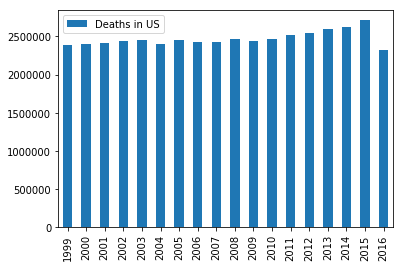

In [34]:
years = np.unique(us_df[0])
count = [us_df[(us_df[0]== y) & (us_df[2] == 'All causes') & (us_df[3] == 'United States')][4].sum() for y in years]
print(np.unique(us_df[2]))
df = ps.DataFrame(data=count, index=years, columns=['Deaths in US'])
df.plot.bar()
plt.savefig('deaths_in_us.png')

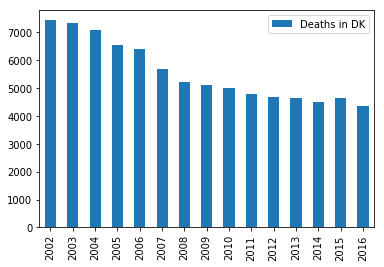

In [36]:
years = np.unique(dk_df[4])
count = []
val = 0
for y in years:
    for x in dk_df[(dk_df[4]== y) & (dk_df[1] == 'A-09 Andre kredsløbssygdomme') & (dk_df[3] == 'Alle aldre') & (dk_df[0] == 'Hele landet')][5]:
        val += int(x.replace(".",""))
    count.append(val)
    val = 0
        

df = ps.DataFrame(data=count, index=years, columns=['Deaths in DK'])
df.plot.bar()
plt.savefig('deaths_in_dk_kredsløbs.png')

In [30]:
years = np.unique(dk_df[1])
years

array(['A-01 Infektiøse inkl. parasitære sygdomme', 'A-02 Kræft',
       'A-03 Andre svulster (anden neoplasi)',
       'A-04 Sygdomme i blod (-dannende) organer, sygdomme, som inddrager immunsystem',
       'A-05 Endokrine og ernæringsbetingede sygdomme samt stofskiftesygdomme',
       'A-06 Psykiske lidelser og adfærdsmæssige forstyrrelser',
       'A-07 Sygdomme i nervesystemet og sanseorganerne',
       'A-08 Hjertesygdomme', 'A-09 Andre kredsløbssygdomme',
       'A-10 Sygdomme i åndedrætsorganer',
       'A-11 Sygdomme i fordøjelsesorganer',
       'A-12 Sygdomme i hud og underhud',
       'A-13 Sygdomme i knogler, muskler og bindevæv',
       'A-14 Sygdomme i urin- og kønsorganer',
       'A-15 Komplikationer ved svangerskab, fødsel og barsel',
       'A-16 Visse sygdomme, der opstår i perinatalperioden',
       'A-17 Medfødte misdannelser og kromosomanomalier',
       'A-18 Symptomer og abnorme fund, dårligt definerede årsager',
       'A-19 Ulykker', 'A-20 Selvmord og selvmord

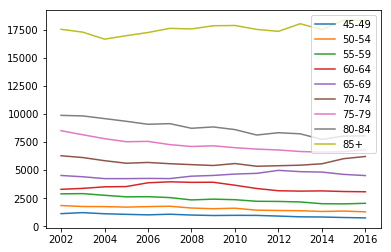

In [57]:
years = np.unique(dk_df[4])
ages = np.unique(dk_df[3])
values = {}
val = 0
for y in years:
    for a in ages:
        if a == "Alle aldre":
            continue
        for x in dk_df[(dk_df[4]== y) & 
                       (dk_df[1] == 'Alle dødsårsager') & 
                       (dk_df[3] == a) & 
                       (dk_df[0] == 'Hele landet') &
                       (dk_df[3] != 'Alle aldre')][5]:
            if "<" in x:
                x = "3"
            if "-" in x:
                x = "0"
            val += int(x.replace(".",""))
        if a in values:
            values[a].append(val)
        else:
            values[a] = [val]
        
        val = 0
        

plt.figure()
for x,y in values.items():
    if x == "85+" or int(x.split("-")[0]) > 40:
        plt.plot(years, y, label=x)
plt.legend(loc='best')
plt.savefig('deaths_in_dk_all_causes_over_45.png', bbox_inches='tight')

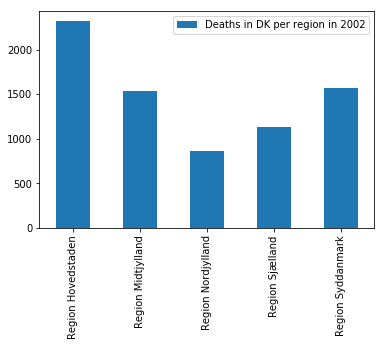

In [54]:
region = np.unique(dk_df[dk_df[0] != 'Hele landet'][0])
count = []
val = 0
for r in region:
    for x in dk_df[(dk_df[4]== 2002) & 
                   (dk_df[1] == 'A-09 Andre kredsløbssygdomme') & 
                   (dk_df[3] == 'Alle aldre') & 
                   (dk_df[0] == r)][5]:
        val += int(x.replace(".",""))
    count.append(val)
    val = 0
        

df = ps.DataFrame(data=count, index=region, columns=['Deaths in DK per region in 2002'])
df.plot.bar()
plt.savefig('deaths_in_dk_kredsløbs_region_2002.png')